# CRAWLING DATA TWITTER MENGGUNAKAN TWINT

## Mount Google Drive

Moount Google Drive dengan Google Collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Masuk ke direktori projek Web Mining

In [ ]:
%cd /content/drive/MyDrive/Web Mining

/content/drive/MyDrive/Web Mining


## Intalasi Twint

Langkah awal clone terlebih twint dari GitHub TwintProject, lalu kita masuk kedalam folder yang sudah kita clone tadi. Tinggal jalankan script dibawah untuk memasang Twint ke projek kita

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/drive/MyDrive/Web Mining/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/Web Mining/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=e6baaca87eb0e23834db29c9919782c6e4ed248bb5438becf452504c38cb73a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ju_eqx_8/wheels/ce/ec/44/07ea4188fed75e2ea686655fde89c7e4deabe23f76daf75d4e
Successfully built twint
  Attempting uninstall: twint
    Fo

Pasang aiohttp berguna menyediakan Web-server dengan middlewares dan plugable routing 

In [ ]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pasang nest-asyncio untuk runtime serentak dalam noteboook

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import nest-asyncio dan juga twint agar bisa melakukan crawling data di twitter

In [ ]:
import nest_asyncio
nest_asyncio.apply()
import twint

## Crawling data twitter 

Jadi disini kita akan melakukan crawling data yang diunduh dari server twitter. Cara ini cukup simpel, cepat dan gak ribet, karena kita gak perlu punya akun twitter, gak perlu API dan tanpa limitasi juga. Kita hanya perlu sebuah tool yang bernama **twint**. 
>**Twint** adalah sebuah tools yang digunakan untuk melakukan scrapping dari aplikasi twitter yang disetting secara khusus menggunakan bahasa pemrograman Python. Twint dapat kita gunakan dan jalankan tanpa harus menggunakan API dari Twitter itu sendiri, dengan kapasitas scrapping data maksimalnya adalah 3200 tweet. Bukan hanya digunakan pada tweet, twint juga bisa kita gunakan untuk melakukan scrapping pada user, followers, retweet dan sebagainya. Twint memanfaatkan operator pencarian twitter untuk memungkinkan proses penghapusan tweet dari user tertentu, memilih dan memilah informasi-informasi yang sensitif, termasuk email dan nomor telepon di dalamnya.

Data yang kita ambil ialah pemberitaan terbaru mengenai data dari negara Indonesia yang sedang diretas oleh orang luar negeri berinisial "Bjorka". Kata kunci yang digunakan 'databocor' pada **c.search**, menggunakan Pandas pada **c.Pandas**, menggunakan limitasi data sebanyak 80 data pada **c.Limit**, dengan menggunakan custom data yang dimasukkan ke csx dengan label Tweet dan data yang diambil tweet-nya saja. Output atau data akan dimasukkan ke dalam file **csv**.

In [ ]:
c = twint.Config()
c.Search = 'databocor'
c.Pandas = True
c.Limit = 80
c.Store_csv = True
c.Custom["tweet"] = ["tweet"]
c.Output = "data.csv"
twint.run.Search(c)

1569536578875281408 2022-09-13 04:00:55 +0000 <PostGorontalo> #DataBocor Mahfud Akui Data Pejabat Diretas Bjorka, Data Luhut Diposting di Telegram  https://t.co/VgqzoUf3da
1569511624184311811 2022-09-13 02:21:45 +0000 <fajaronline> BSSN Anggarkan Rp 1,8 Miliar untuk Buat Kolam Ranang, Fadli Zon: Lebih Penting dari Keamanan Siber  https://t.co/YVePTxowe4 #BSSN #DataBocor #FadliZon #KolamRenang
1569504645663571968 2022-09-13 01:54:02 +0000 <hitmeup_flora> @NadiBangsa @nvcarenvmind @opposite090l92 @bjorkanism Terus mau nyalahin siapa dong , ini udah nunjukin bahwa data kita gak di lindungi sama sekali wkwkwk daftar sim card-databocor-himbauan basi suruh ganti kata sandi.. ya udhlah ya , nyimak aja apa yang di perbuat si hacker itu 🤣
1569340924081340417 2022-09-12 15:03:27 +0000 <mohamadyani78> #Demo versi IT... #databocor #hackerbjorka panen fans, hingga jadi #trending di #Media masa dan #Viral di #Indonesia banyak #Data bocor. Masyarakat tak panik jika yang menjaga #data nya tidak kebobo

Membuka file **csv** yang sudah dilabeli secara manual dengan 3 kelas yaitu positif, netral, dan negatif. 

In [ ]:
%cd /content/drive/MyDrive/Web Mining/webmining

/content/drive/MyDrive/Web Mining/webmining


In [ ]:
import pandas as pd
data = pd.read_csv('dataBocor.csv')
data

,tweet,label
0,#DataBocor Mahfud Akui Data Pejabat Diretas Bj...,netral
1,"BSSN Anggarkan Rp 1,8 Miliar untuk Buat Kolam ...",positif
2,@NadiBangsa @nvcarenvmind @opposite090l92 @bjo...,netral
3,#Demo versi IT... #databocor #hackerbjorka pan...,positif
4,Puan Desak Pemerintah Segera Audit Keamanan Si...,positif
...,...,...
75,SALE SALE SALE CREWNECK RAJUT BY UNIQLO SIZE...,netral
76,@kemkominfo Ya inilah negara konoha #databocor...,negatif
77,Situs Forum Hacker Penjual Data https://t.co/...,netral
78,@agitavia @hhaeeew Hati hati no penipu Dengan...,netral


## Preprocessing

Preprocessing adalah proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini penting dilakukan karena data mentah sering kali tidak memiliki format yang teratur. Selain itu, data mining juga tidak dapat memproses data mentah, sehingga proses ini sangat penting dilakukan untuk mempermudah proses berikutnya, yakni analisis data.


>**NLTK** adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu kita dalam bekerja dengan teks. Library ini memudahkan kita untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.

>**Python Sastrawi** adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”



In [9]:
!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


Pembuatan matriks menggunakan module pandas beserta numpy agar matriks yang dibuat sesuai dengan kebutuhan.

>**Pandas** adalah sebuah library di Python yang berlisensi BSD dan open source yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya. Struktur data dasar pada Pandas dinamakan DataFrame, yang memudahkan kita untuk membaca sebuah file dengan banyak jenis format seperti file .txt, .csv, dan .tsv. Fitur ini akan menjadikannya table dan juga dapat mengolah suatu data dengan menggunakan operasi seperti join, distinct, group by, agregasi, dan teknik lainnya yang terdapat pada SQL.

>**NumPy** merupakan singkatan dari Numerical Python. NumPy merupakan salah satu library Python yang berfungsi untuk proses komputasi numerik. NumPy memiliki kemampuan untuk membuat objek N-dimensi array. Array merupakan sekumpulan variabel yang memiliki tipe data yang sama. Kelebihan dari NumPy Array adalah dapat memudahkan operasi komputasi pada data, cocok untuk melakukan akses secara acak, dan elemen array merupakan sebuah nilai yang independen sehingga penyimpanannya dianggap sangat efisien.

In [10]:
import pandas as pd
import re
import numpy as np

import nltk
nltk.download('punkt')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Function Remove Stopwords** berguna menghapus kata-kata yang tidak diperlukan dalam proses nantinya,sehingga dapat mempercepat proses VSM. Kita meenggunakan kumpulan stopword dari github yang berjumlah sekitar 700 kata. 

In [ ]:
def remove_stopwords(text):
    with open('/content/drive/MyDrive/Web Mining/webmining/stopwords.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
                     
    return text

**Stemming** merupakan proses mengubah kata dalam bahasa Indonesia ke akar katanya atau tidak ada kata yang berimbuhan pada awal maupun akhir kata serta tidak ada kata yang berulangan misalkan 'anak perempuan berjalan - jalan' menjadi 'anak perempuan jalan'

In [ ]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    result = [stemmer.stem(word) for word in text]
    
    return result

**Preprocessing** terdiri dari beberapa tahapan yang terdiri dari :


* Mengubah Text menjadi huruf kecil
* Menghilangkan non ASCII seperti emotikon, penulisan Cina, dan sebagainya.
* Menghilangkan mention, Url didalam Text, dan hashtag.
* Mengubah/menghilangkan tanda baca (misalkan garis miring menjadi spasi)
* Melakukan tokenization kata dan Penghapusan Kata yang tidak digunakan
* Memfilter kata dari tanda baca
* Mengubah kata dalam bahasa Indonesia ke akar katanya
* Menghapus String kosong

In [ ]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text

Menyimpan data yang sudah dilakukan Preprocessing ke dalam file csv baru dan tersimpan di folder yang sama dengan file ipynb.

In [ ]:
data['tweet'].apply(preprocessing).to_csv('hasilPreprocessing.csv')

In [ ]:
dataPre = pd.read_csv('hasilPreprocessing.csv')
dataPre

,Unnamed: 0,tweet
0,0,"['mahfud', 'aku', 'data', 'jabat', 'retas', 'b..."
1,1,"['bssn', 'anggar', 'rp', '18', 'miliar', 'kola..."
2,2,"['nyalahin', 'udah', 'nunjukin', 'data', 'gak'..."
3,3,"['versi', 'it', 'panen', 'fans', 'bocor', 'mas..."
4,4,"['puan', 'desak', 'perintah', 'audit', 'aman',..."
...,...,...
75,75,"['sale', 'sale', 'sale', 'crewneck', 'rajut', ..."
76,76,"['ya', 'negara', 'konoha', 'kerja', 'orang', '..."
77,77,"['situs', 'forum', 'hacker', 'jual', 'data']"
78,78,"['hati', 'hati', 'no', 'tipu', 'modus', 'kirim..."


## Vector Space Model

Vector Space Model (VSM) merupakan sebuah pendekatan natural yang berbasis pada vektor dari setiap kata dalam suatu dimensi spasial. Dokumen dipandang sebagai sebuah vektor yang memiliki magnitude (jarak) dan direction (arah). Pada VSM, sebuah kata direpresentasikan dengan sebuah dimensi dari ruang vektor. Relevansi sebuah dokumen ke sebuah kueri didasarkan pada similaritas diantara vektor dokumen dan vektor kueri.

Import modul untuk membuat Vector Space Model dari library Sklearn, serta import data hasil preprocessing 

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/hasilPreprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])

Membuat matriks menjadi matriks array dan dilakukan shape pada matriks yang sudah dibuat 

In [13]:
matrik_vsm = bag.toarray()
matrik_vsm.shape

(80, 507)

In [14]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Mengambil semua kata yang sudah di tokenizing menjadi kolom - kolom atau fitur pada matriks VSM

In [15]:
a = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Menampilkan Matriks VSM yang sduah dihitung frekuensi kemunculan term pada setiap tweet atau dokumen.

In [16]:
dataTF = pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

,01,10,100,105,115k,126p,13m,18,20,2018,...,widodo,wkwkwk,ya,yak,yg,ygy,you,your,yt,zon
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menambahkan kolom label pada setiap tweet dan mengisi setiap baris pada kolom Label dengan data yang telah diisi manual.

In [17]:
label = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/dataBocor.csv')
dataVSM = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dataVSM

,"(index,)","(01,)","(10,)","(100,)","(105,)","(115k,)","(126p,)","(13m,)","(18,)","(20,)",...,"(wkwkwk,)","(ya,)","(yak,)","(yg,)","(ygy,)","(you,)","(your,)","(yt,)","(zon,)",label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,positif
2,3,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,netral
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
76,77,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negatif
77,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
78,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral


Membuat Kolom Label menjadi kolom unique

In [18]:
dataVSM['label'].unique()

array(['netral', 'positif', 'negatif'], dtype=object)

In [19]:
dataVSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 509 entries, ('index',) to label
dtypes: int64(508), object(1)
memory usage: 318.2+ KB


## Mutual Information

Scikit-learn atau sklearn merupakan sebuah module dari bahasa pemrograman Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.

In [20]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Menghitung Information gain 

Information Gain merupakan teknik seleksi fitur yang memakai metode scoring untuk nominal ataupun pembobotan atribut kontinue yang didiskretkan menggunakan maksimal entropy. Suatu entropy digunakan untuk mendefinisikan nilai Information Gain. Entropy menggambarkan banyaknya informasi yang dibutuhkan untuk mengkodekan suatu kelas. Information Gain (IG) dari suatu term diukur dengan menghitung jumlah bit informasi yang diambil dari prediksi kategori dengan ada atau tidaknya term dalam suatu dokumen.

$$
Entropy \ (S) \equiv \sum ^{c}_{i}P_{i}\log _{2}p_{i}
$$

c  : jumlah nilai yang ada pada atribut target (jumlah kelas klasifikasi).

Pi : porsi sampel untuk kelas i.


$$
Gain \ (S,A) \equiv Entropy(S) - \sum _{\nu \varepsilon \ values } \dfrac{\left| S_{i}\right| }{\left| S\right|} Entropy(S_{v})
$$

A : atribut

V : menyatakan suatu nilai yang mungkin untuk atribut A

Values (A) : himpunan nilai-nilai yang mungkin untuk atribut A

|Sv| : jumlah Sampel untuk nilai v

|S| : jumlah seluruh sample data Entropy 

(Sv) : entropy untuk sampel sampel yang memiliki nilai v


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataVSM.drop(labels=['label'], axis=1),
    dataVSM['label'],
    test_size=0.3,
    random_state=0)

In [22]:
X_train

,"(index,)","(01,)","(10,)","(100,)","(105,)","(115k,)","(126p,)","(13m,)","(18,)","(20,)",...,"(widodo,)","(wkwkwk,)","(ya,)","(yak,)","(yg,)","(ygy,)","(you,)","(your,)","(yt,)","(zon,)"
55,56,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17,18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,61,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menghitung Information gain menggunakan modul yang sudah ada di sklearn dengan mengambil data yang sudah ditrain split.

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.09925492, 0.        , 0.03415921, 0.05767232, 0.        ,
       0.        , 0.        , 0.10478688, 0.13948204, 0.06480028,
       0.        , 0.05306857, 0.        , 0.        , 0.02572368,
       0.        , 0.00522343, 0.        , 0.        , 0.        ,
       0.        , 0.01798653, 0.        , 0.        , 0.04765978,
       0.09534751, 0.00831653, 0.03249308, 0.        , 0.07445186,
       0.        , 0.05709115, 0.        , 0.05940035, 0.03027748,
       0.        , 0.0113788 , 0.        , 0.02288195, 0.        ,
       0.02595669, 0.0043843 , 0.        , 0.05733384, 0.        ,
       0.13866616, 0.0961746 , 0.        , 0.0634803 , 0.        ,
       0.        , 0.12009159, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0615031 , 0.        , 0.        ,
       0.02472767, 0.09468484, 0.09473722, 0.14006722, 0.        ,
       0.        , 0.02557598, 0.09611728, 0.        , 0.02454744,
       0.        , 0.0041203 , 0.05083569, 0.10027923, 0.     

Meranking setiap term mulai dari information gain terbesar sampai yang terkecil.

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

(hukum,)       0.290793
(pakai,)       0.250074
(telegram,)    0.228995
(sampek,)      0.212809
(nyata,)       0.202320
                 ...   
(menep,)       0.000000
(dunia,)       0.000000
(efek,)        0.000000
(eh,)          0.000000
(mabok2an,)    0.000000
Length: 508, dtype: float64

Membuat plot berbentuk grafik batang atau bar dari data perankingan term.

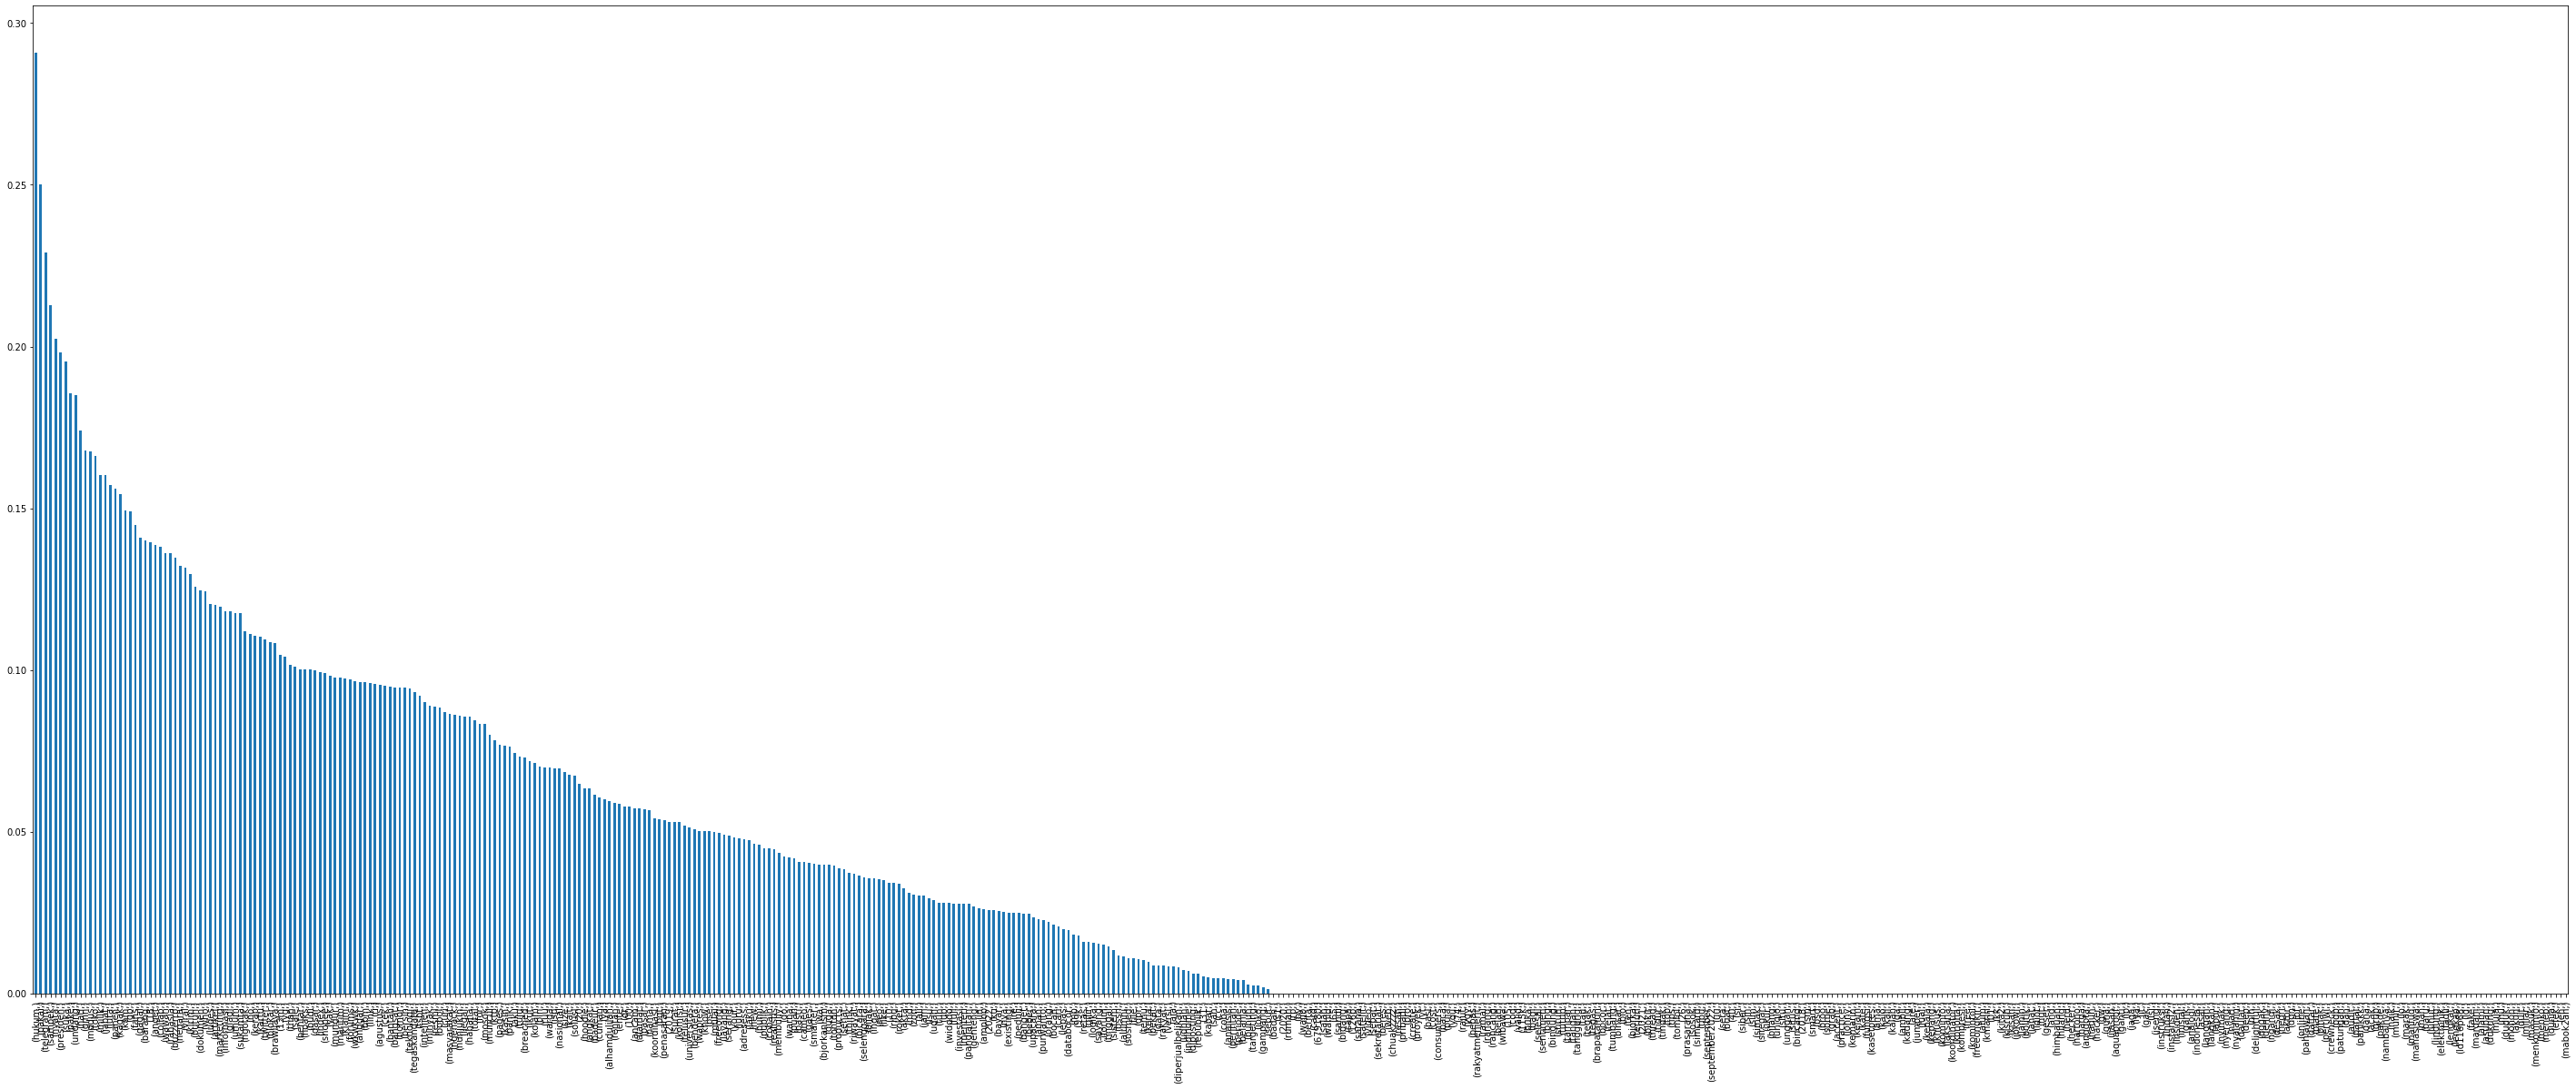

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(50, 20))

In [26]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=100)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index([     ('index',),       ('2021',),       ('2022',),         ('31',),
              ('99k',),        ('aku',),       ('alum',),        ('ama',),
          ('anggota',),       ('baca',),     ('badeur',),     ('banget',),
          ('bendera',),      ('beres',),     ('bersih',),      ('bijak',),
           ('binsar',),     ('bjorka',),     ('blokar',),     ('blokir',),
            ('bobol',),  ('brawijaya',),       ('cari',),        ('cod',),
        ('consumers',),   ('crewneck',),      ('cuman',), ('delightful',),
          ('dokumen',),      ('dunia',), ('elektronik',),       ('fans',),
            ('gagal',),      ('geser',),      ('gilir',),        ('gmn',),
             ('grab',),         ('gw',),       ('hati',),   ('himbauan',),
            ('hoaks',),        ('hut',),      ('idiot',),       ('ikut',),
        ('indonesia',),  ('informasi',),      ('ingat',),        ('iya',),
            ('kabar',),     ('kadang',),       ('kait',),       ('kali',),
            ('kartu',),  

In [27]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

## Klasifikasi

### KNN
Algoritma K-Nearest Neighbor (KNN) adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya. Termasuk dalam supervised learning, dimana hasil query instance yang baru diklasifikasikan berdasarkan mayoritas kedekatan jarak dari kategori yang ada dalam K-NN. Algoritma ini bertujuan untuk mengklasifikasikan obyek baru berdasarkan atribut dan sample-sample dari training data.

Import algoritma KNN dari sklearn, lalu aktifkan fungsi klasifikasi KNN serta atur koefisien N, pada dataset ini N sudah diatur dengan 2 sebab akurasi terbaik terdapat pada angka N ke 2.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test) 
Y_pred

array(['negatif', 'netral', 'netral', 'negatif', 'netral', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif',
       'positif', 'negatif', 'negatif', 'netral', 'positif', 'netral',
       'negatif', 'netral', 'negatif', 'negatif', 'negatif', 'negatif'],
      dtype=object)

Menampilkan nilai akurasi dari algoritma KNN

In [31]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
testing = neigh.predict(X_test) 
accuracy_neigh=round(accuracy_score(y_test,testing)* 100, 2)
accuracy_neigh

45.83

### Confusion Matrix
Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. 


In [32]:
import matplotlib.pyplot as plt
from sklearn import metrics

Import pyplot untuk membuat plot matriks menjadi tidak eror jika ditampilkan, lalu import metrics dari sklearn untuk membuat matriksnya.

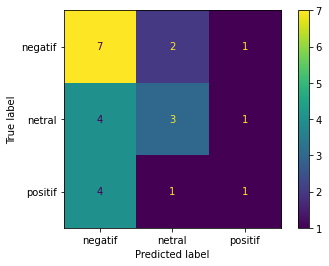

In [37]:
conf_matrix =metrics.confusion_matrix(y_true=y_test, y_pred=Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['negatif', 'netral','positif'])
cm_display.plot()
plt.show()

## Clustering

### K MEANS
Algoritma k-means merupakan algoritma yang membutuhkan parameter input sebanyak k dan membagi sekumpulan n objek kedalam k cluster sehingga tingkat kemiripan antar anggota dalam satu cluster tinggi sedangkan tingkat kemiripan dengan anggota pada cluster lain sangat rendah. Kemiripan anggota terhadap cluster diukur dengan kedekatan objek terhadap nilai mean pada cluster atau dapat disebut sebagai centroid cluster.

Rumus menghitung jarak terdekat digunakan formula *Ecludean* sebagai berikut :

$$
d(i,j) = \sqrt{\sum ^{m}_{j=1}\left( x_{ij}-c_{kj}\right) ^{2}}
$$

[[ 0.06291564 -0.08144143]
 [ 0.94134721 -0.18155896]
 [ 1.13742363  2.09113126]]


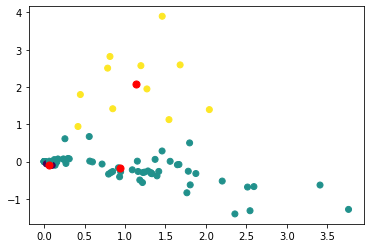

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

"""Train the Kmeans with the best n of clusters"""
modelKm = KMeans(n_clusters=3, random_state=12)
modelKm.fit(dataTF.values)
prediksi = modelKm.predict(dataTF.values)

"""Dimensionality reduction used to plot in 2d representation"""
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(dataTF.values)
centroids=pc.transform(modelKm.cluster_centers_)
print(centroids)
plt.scatter(X_new[:,0],X_new[:,1],c=prediksi, cmap='viridis')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'red')